## 1. 라이브러리 임포트 및 경로 설정

In [1]:
# 1) 라이브러리 임포트
import os
import glob
import platform
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 시각화 스타일 설정
sns.set_theme(style="whitegrid")  

# 2) HS-FAD 데이터셋 최상위 경로 설정
root_dir = "/mnt/disk3/face_age_gender_estimation/HS-FAD"  # 실제 HS-AFD 데이터 경로로 변경

In [2]:
def set_font():
    current_os = platform.system()
    print(current_os)

    if current_os == "Linux":
        # 사용 가능한 폰트 목록 출력 (디버깅용)
        fonts = [f.name for f in fm.fontManager.ttflist]
        # print("Available fonts:", fonts)
        
        try:
            # 여러 폰트 경로 시도
            font_paths = [
                '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
                '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                '/usr/share/fonts/nanum/NanumGothic.ttf'
            ]
            
            font_found = False
            for font_path in font_paths:
                try:
                    font = fm.FontProperties(fname=font_path)
                    plt.rcParams['font.family'] = font.get_name()
                    print(f"Successfully loaded font from: {font_path}")
                    font_found = True
                    break
                except:
                    continue
            
            if not font_found:
                # 폰트 이름으로 직접 설정 시도
                plt.rcParams['font.family'] = 'NanumGothic'
                
        except Exception as e:
            print(f"Font setting error: {str(e)}")
            print("Falling back to default font")
            
    elif current_os == "Windows":
        font_path = "C:/Windows/Fonts/malgun.ttf"
        fontprop = fm.FontProperties(fname=font_path, size=12)
        plt.rc("font", family=fontprop.get_name())
    elif current_os == "Darwin":
        plt.rcParams["font.family"] = "AppleGothic"

    plt.rcParams["axes.unicode_minus"] = False

# matplotlib 캐시 재생성
fm._load_fontmanager(try_read_cache=False)

set_font()

Linux
Successfully loaded font from: /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf


## 2. 데이터프레임 만들기

In [3]:
# AFAD 데이터셋의 이미지들을 전부 찾고, age/gender 정보를 추출해 DataFrame 생성

all_image_paths = glob.glob(os.path.join(root_dir, "*", "*", "*.jpg"))

records = []
for img_path in all_image_paths:
    # 예: /path/to/AFAD/20/111/XXX.jpg
    parts = img_path.split(os.sep)
    age_str = parts[-3]      # "20"
    gender_str = parts[-2]   # "111" or "112"
    
    # 성별 코드 변환: 111 -> 남(0), 112 -> 여(1)
    gender = 0 if gender_str == "111" else 1
    
    age = int(age_str)
    
    records.append({"image_path": img_path, "age": age, "gender": gender})

df = pd.DataFrame(records)
df.head()

,image_path,age,gender
0,/mnt/disk3/face_age_gender_estimation/HS-FAD/1...,10,0
1,/mnt/disk3/face_age_gender_estimation/HS-FAD/1...,10,0
2,/mnt/disk3/face_age_gender_estimation/HS-FAD/1...,10,0
3,/mnt/disk3/face_age_gender_estimation/HS-FAD/1...,10,0
4,/mnt/disk3/face_age_gender_estimation/HS-FAD/1...,10,0


In [4]:
df.info() 
# df 컬럼
# image_path: 이미지 파일 경로
# age: 나이 (정수)
# gender: 0=남성, 1=여성

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13151 entries, 0 to 13150
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  13151 non-null  object
 1   age         13151 non-null  int64 
 2   gender      13151 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 308.4+ KB


## 3. 기본 통계 정보 확인

In [5]:
# 데이터 개수, 컬럼 형식, 누락 데이터 등 간단히 체크
print("데이터프레임 크기:", df.shape)
print()
print(df.info())
print()
print(df.describe())


데이터프레임 크기: (13151, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13151 entries, 0 to 13150
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  13151 non-null  object
 1   age         13151 non-null  int64 
 2   gender      13151 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 308.4+ KB
None

                age        gender
count  13151.000000  13151.000000
mean      30.712493      0.440727
std        9.372007      0.496493
min       10.000000      0.000000
25%       30.000000      0.000000
50%       30.000000      0.000000
75%       30.000000      1.000000
max       50.000000      1.000000


## 4. 성별 분포 확인

/tmp/ipykernel_4123875/243049699.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")


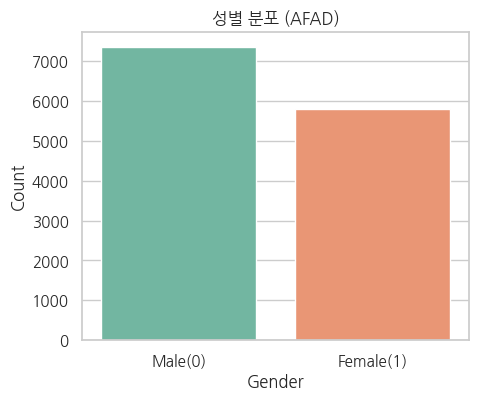

남성 이미지 수: 7355
여성 이미지 수: 5796


In [6]:
# 성별 컬럼값이 0(남성), 1(여성)으로 되어있음
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(5, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")
plt.xticks([0,1], ['Male(0)', 'Female(1)'])
plt.title("성별 분포 (HS-FAD)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print("남성 이미지 수:", gender_counts[0])
print("여성 이미지 수:", gender_counts[1])

## 5. 나이 분포 확인

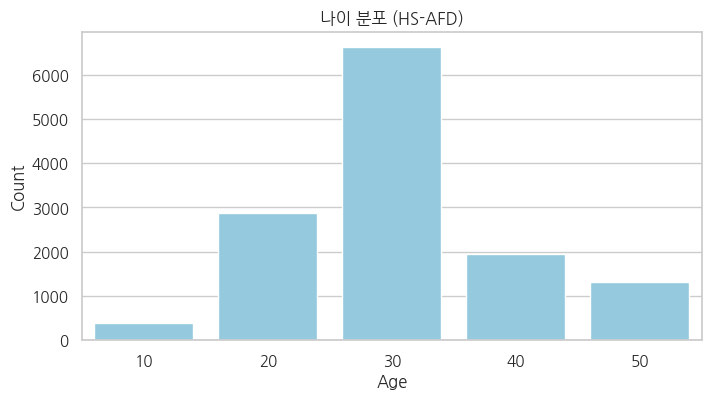

In [12]:
plt.figure(figsize=(8, 4))
age_counts = df['age'].value_counts().sort_index()  # 나이별 빈도수를 계산하고 나이순으로 정렬
sns.barplot(x=age_counts.index, y=age_counts.values, color="skyblue")
plt.title("나이 분포 (HS-AFD)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## 6. 나이별 성별 분포 (Grouped)

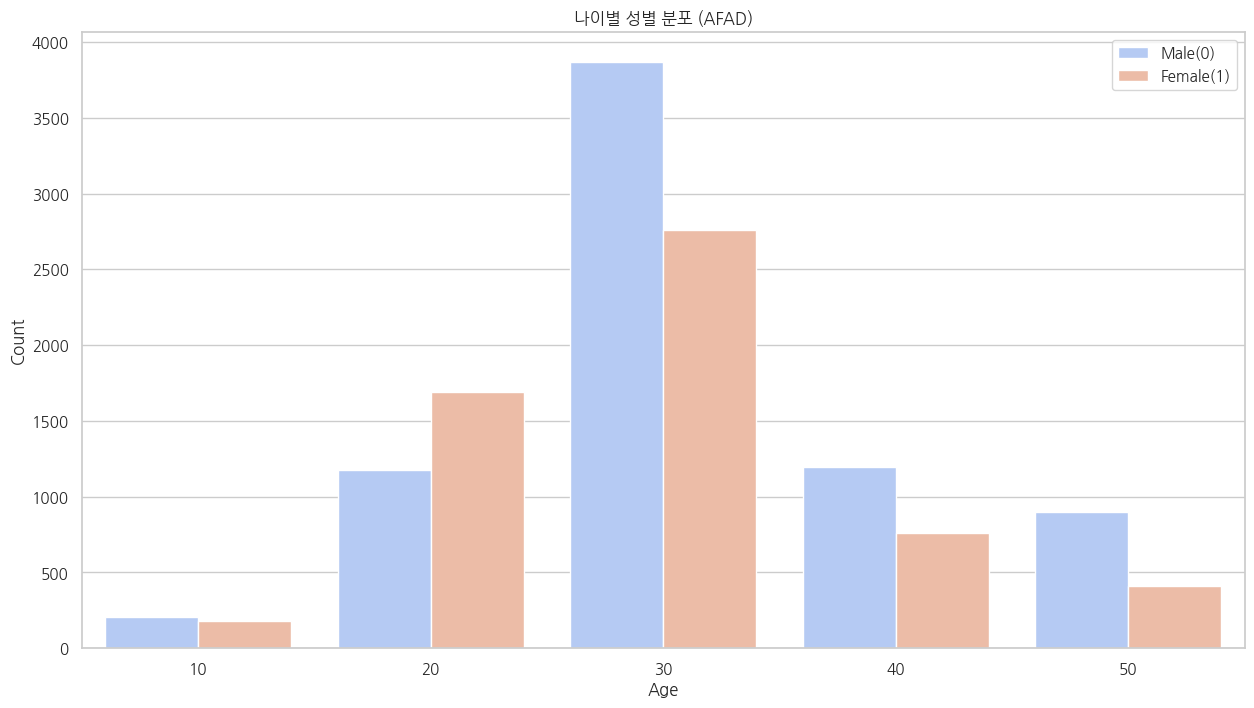

In [13]:
plt.figure(figsize=(15, 8))

# age를 x축, gender를 hue로 하여 countplot
sns.countplot(data=df, x='age', hue='gender', palette="coolwarm")

plt.title("나이별 성별 분포 (AFAD)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(labels=["Male(0)", "Female(1)"])
plt.show()


## 7. 피벗 & 히트맵(Heatmap) 시각화 

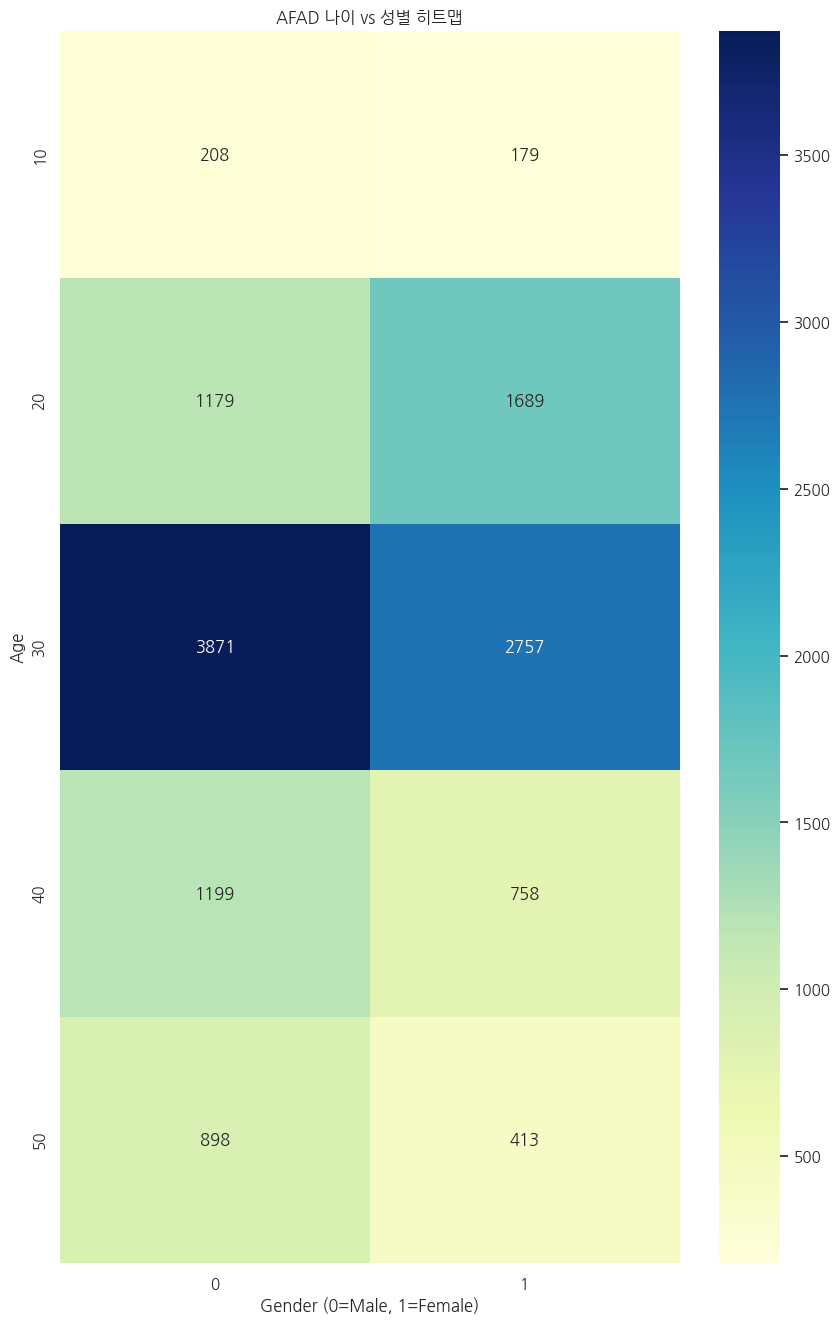

In [14]:
# age, gender 조합에 대한 카운트를 피벗 테이블로 만들어서 히트맵 시각화해볼 수 있음
pivot_df = df.groupby(["age", "gender"]).size().reset_index(name="count")
pivot_df = pivot_df.pivot(index="age", columns="gender", values="count").fillna(0)

plt.figure(figsize=(10, 16))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("AFAD 나이 vs 성별 히트맵")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Age")
plt.show()

In [15]:
print("요약:")
print(f"- 전체 이미지 개수: {len(df)}")
print(f"- 성별(남성): {sum(df['gender'] == 0)}, 성별(여성): {sum(df['gender'] == 1)}")
print(f"- 나이 최솟값: {df['age'].min()}, 나이 최댓값: {df['age'].max()}")

요약:
- 전체 이미지 개수: 13151
- 성별(남성): 7355, 성별(여성): 5796
- 나이 최솟값: 10, 나이 최댓값: 50
